# SAT scores in the US by state

> This project is developed in a **group of 3 people**. 

# Project Objective

The goal of the project is to explore the relationship of a specific variable with various regressors from dataset provided by Sleuth2 library. This concerns the following dataset:

- **ID**: `case1201`
- **Title**: State Average SAT Scores
- **URL**: [Sleuth2: Data Sets from Ramsey and Schafer's "Statistical Sleuth (2nd Ed)", p. 26](https://cran.r-project.org/web/packages/Sleuth2/Sleuth2.pdf)

### Task 1:
Load the data file and perform basic statistical inquiries:

- Briefly describe the data and individual variables in words.
- Determine the most important statistical measures that best characterize the data.
- Represent the data appropriately using selected graphs.

### Task 2:
Select one numerical variable as a regressor.

- Using a linear regression model or its variant (e.g., quadratic regression, etc.), examine the relationship between the dependent variable and this regressor.
- Display the outputs graphically.
- Practically interpret the estimated values of regression coefficients.
- Evaluate the model's quality - does chosen regressor explain the behavior of the dependent variable well?

### Task 3:
Select one categorical variable as a regressor.

- Using an analysis of variance model, examine the relationship between the dependent variable and this regressor.
- Practically interpret the values of regression coefficients.
- Evaluate the model's quality.

### Task 4:
Consider a regression model that includes both regressors from the previous tasks, including their interaction.

- Estimate its parameters and interpret them.
- Examine the significance of individual components.
- Appropriately visualize the regression relationship.

### Task 5:
Consider a model with the previous two regressors and at least one additional variable from the dataset under investigation.

- Explore which regressors are significant for the model and which are not.
- Using appropriate tools, try to find a suitable final model that explains the behavior of the dependent variable well but does not include insignificant components.
- Explain your approach and justify your choices.
- Practically interpret the final model.

### Task 6:
For the final model, use appropriate tests to verify the assumptions of the methods you have used.

## Task 1

Load the dataset and perform basic statistical investigations:

- Briefly describe the data and the variables verbally.
- Identify the most important statistical measures that best characterize the data.
- Represent the data appropriately using selected graphs.


### Reading in the data


In [1]:
install.packages("Sleuth2")
install.packages("GGally")

library(Sleuth2)
library(dplyr)
library(ggplot2)
library(repr)
library(maps)


Installing package into '/opt/homebrew/lib/R/4.3/site-library'
(as 'lib' is unspecified)



Installing package into '/opt/homebrew/lib/R/4.3/site-library'
(as 'lib' is unspecified)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
data(case1201)
df <- case1201


### Dataset description


We are goingo to study the data on the average SAT scores for US states in 1982 and possible associated factors.

| Variable | Description                                                                                                                                                                                                        |
| -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| State    | US state                                                                                                                                                                                                           |
| SAT      | State averages of the total SAT (verbal + quantitative) scores                                                                                                                                                     |
| Takers   | Percentage of the total eligible students (high school seniors) in the state who took the exam. (Percentage of students, who decided to take SAT exam. We did not actually now whether they have succeeded or not) |
| Income   | Median income of families of test-takers (in hundreds of dollars)                                                                                                                                                  |
| Years    | Average number of years that the test-takers had formal studies in social sciences, natural sciences, and humanities                                                                                               |
| Public   | Percentage of the test-takers who attended public secondary schools                                                                                                                                                |
| Expend   | Total state expenditure on secondary schools (in hundreds of dollars per student)                                                                                                                                  |
| Rank     | Median percentile ranking of the test-takers within their secondary school classes                                                                                                                                 |


In [3]:
head(df)


,State,SAT,Takers,Income,Years,Public,Expend,Rank
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Iowa,1088,3,326,16.79,87.8,25.60,89.7
2,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
3,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
4,Kansas,1045,5,338,16.30,83.9,27.14,86.3
5,Nebraska,1045,5,293,17.25,83.6,21.05,88.5
6,Montana,1033,8,263,15.91,93.7,29.48,86.4


### Data conversions


Add a space between words in states, like `SouthDakota` -> `South Dakota`.


In [4]:
df$State <- gsub("(?<!^)([A-Z])", " \\1", df$State, perl = TRUE)
print(df$State)


 [1] "Iowa"           "South Dakota"   "North Dakota"   "Kansas"        
 [5] "Nebraska"       "Montana"        "Minnesota"      "Utah"          
 [9] "Wyoming"        "Wisconsin"      "Oklahoma"       "Arkansas"      
[13] "Tennessee"      "New Mexico"     "Idaho"          "Mississippi"   
[17] "Kentucky"       "Colorado"       "Washington"     "Arizona"       
[21] "Illinois"       "Louisiana"      "Missouri"       "Michigan"      
[25] "West Virginia"  "Alabama"        "Ohio"           "New Hampshire" 
[29] "Alaska"         "Nevada"         "Oregon"         "Vermont"       
[33] "California"     "Delaware"       "Connecticut"    "New York"      
[37] "Maine"          "Florida"        "Maryland"       "Virginia"      
[41] "Massachusetts"  "Pennsylvania"   "Rhode Island"   "New Jersey"    
[45] "Texas"          "Indiana"        "Hawaii"         "North Carolina"
[49] "Georgia"        "South Carolina"


Let's convert the `State` column to categorical.


In [5]:
df$State <- as.factor(df$State)


Now let's find `dbl` columns which have only integer values.


In [6]:
dbl_cols <- sapply(df, is.double)
int_cols <- sapply(df[dbl_cols], function(x) all(x == as.integer(x)))
names(df[dbl_cols][int_cols])


[1] "SAT"    "Takers" "Income"

Now let's convert these columns to `int` type.


In [7]:
df[dbl_cols][int_cols] <- lapply(df[dbl_cols][int_cols], as.integer)
head(df)


,State,SAT,Takers,Income,Years,Public,Expend,Rank
,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Iowa,1088,3,326,16.79,87.8,25.60,89.7
2,South Dakota,1075,2,264,16.07,86.2,19.95,90.6
3,North Dakota,1068,3,317,16.57,88.3,20.62,89.8
4,Kansas,1045,5,338,16.30,83.9,27.14,86.3
5,Nebraska,1045,5,293,17.25,83.6,21.05,88.5
6,Montana,1033,8,263,15.91,93.7,29.48,86.4


### Statistical measures


Let's see the general info about our data.


In [8]:
summary(df)


        State         SAT             Takers          Income     
 Alabama   : 1   Min.   : 790.0   Min.   : 2.00   Min.   :208.0  
 Alaska    : 1   1st Qu.: 889.2   1st Qu.: 6.25   1st Qu.:261.5  
 Arizona   : 1   Median : 966.0   Median :16.00   Median :295.0  
 Arkansas  : 1   Mean   : 947.9   Mean   :26.22   Mean   :294.0  
 California: 1   3rd Qu.: 998.5   3rd Qu.:47.75   3rd Qu.:325.0  
 Colorado  : 1   Max.   :1088.0   Max.   :69.00   Max.   :401.0  
 (Other)   :44                                                   
     Years           Public          Expend           Rank      
 Min.   :14.39   Min.   :44.80   Min.   :13.84   Min.   :69.80  
 1st Qu.:15.91   1st Qu.:76.92   1st Qu.:19.59   1st Qu.:74.03  
 Median :16.36   Median :80.80   Median :21.61   Median :80.85  
 Mean   :16.21   Mean   :81.20   Mean   :22.97   Mean   :79.99  
 3rd Qu.:16.76   3rd Qu.:88.25   3rd Qu.:26.39   3rd Qu.:85.83  
 Max.   :17.41   Max.   :97.00   Max.   :50.10   Max.   :90.60  
                 

Now we are going to calculate the standard deviation and variance.


In [9]:
numeric_vars <- sapply(df, is.numeric)

summary_stats <- data.frame(
    Standart_Deviation = sapply(df[, numeric_vars], sd, na.rm = TRUE),
    Variance = sapply(df[, numeric_vars], var, na.rm = TRUE)
)

print(summary_stats)


       Standart_Deviation    Variance
SAT            70.8563969 5020.628980
Takers         22.0225209  484.991429
Income         43.6930340 1909.081224
Years           0.6999821    0.489975
Public          9.8309166   96.646922
Expend          6.1449322   37.760191
Rank            6.5230713   42.550459


### Basic visualizations


Firstly, we are going to define a custom theme so the plots are more readable.


In [10]:
theme <- theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 30, hjust = 1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title = element_text(size = 16),
        axis.title.x = element_text(margin = margin(20, 0, 0, 0)),
        axis.title.y = element_text(margin = margin(0, 20, 0, 0)),
        plot.title = element_text(size = 20, hjust = 0.5, face = "bold", margin = margin(0, 0, 20, 0)),
        plot.margin = margin(1, 1, 1, 1, "cm"),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)
    )


Secondly, we are going to define a mapping between a state and a larger geographical region: Northeast, South, Midwest, and West.


In [11]:
map_state_to_region <- function(state_name) {
    northeast <- c(
        "Connecticut", "Maine", "Massachusetts", "New Hampshire",
        "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"
    )
    midwest <- c(
        "Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota",
        "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota",
        "Wisconsin"
    )
    south <- c(
        "Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky",
        "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma",
        "South Carolina", "Tennessee", "Texas", "Virginia", "West Virginia"
    )
    west <- c(
        "Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho",
        "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington",
        "Wyoming"
    )

    if (state_name %in% northeast) {
        return("Northeast")
    } else if (state_name %in% midwest) {
        return("Midwest")
    } else if (state_name %in% south) {
        return("South")
    } else if (state_name %in% west) {
        return("West")
    } else {
        return("Unknown")
    }
}


Now we are going to apply the mapping to create a new column.


In [12]:
df$Region <- sapply(df$State, map_state_to_region)
df$Region <- as.factor(df$Region)


In [13]:
head(df)


,State,SAT,Takers,Income,Years,Public,Expend,Rank,Region
,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Iowa,1088,3,326,16.79,87.8,25.60,89.7,Midwest
2,South Dakota,1075,2,264,16.07,86.2,19.95,90.6,Midwest
3,North Dakota,1068,3,317,16.57,88.3,20.62,89.8,Midwest
4,Kansas,1045,5,338,16.30,83.9,27.14,86.3,Midwest
5,Nebraska,1045,5,293,17.25,83.6,21.05,88.5,Midwest
6,Montana,1033,8,263,15.91,93.7,29.48,86.4,West


Check we have no `Unknown` regions.


In [14]:
table(df$Region)



  Midwest Northeast     South      West 
       12         9        16        13 

We are ready to plot the SAT scores by the large geographical regions we have just created.


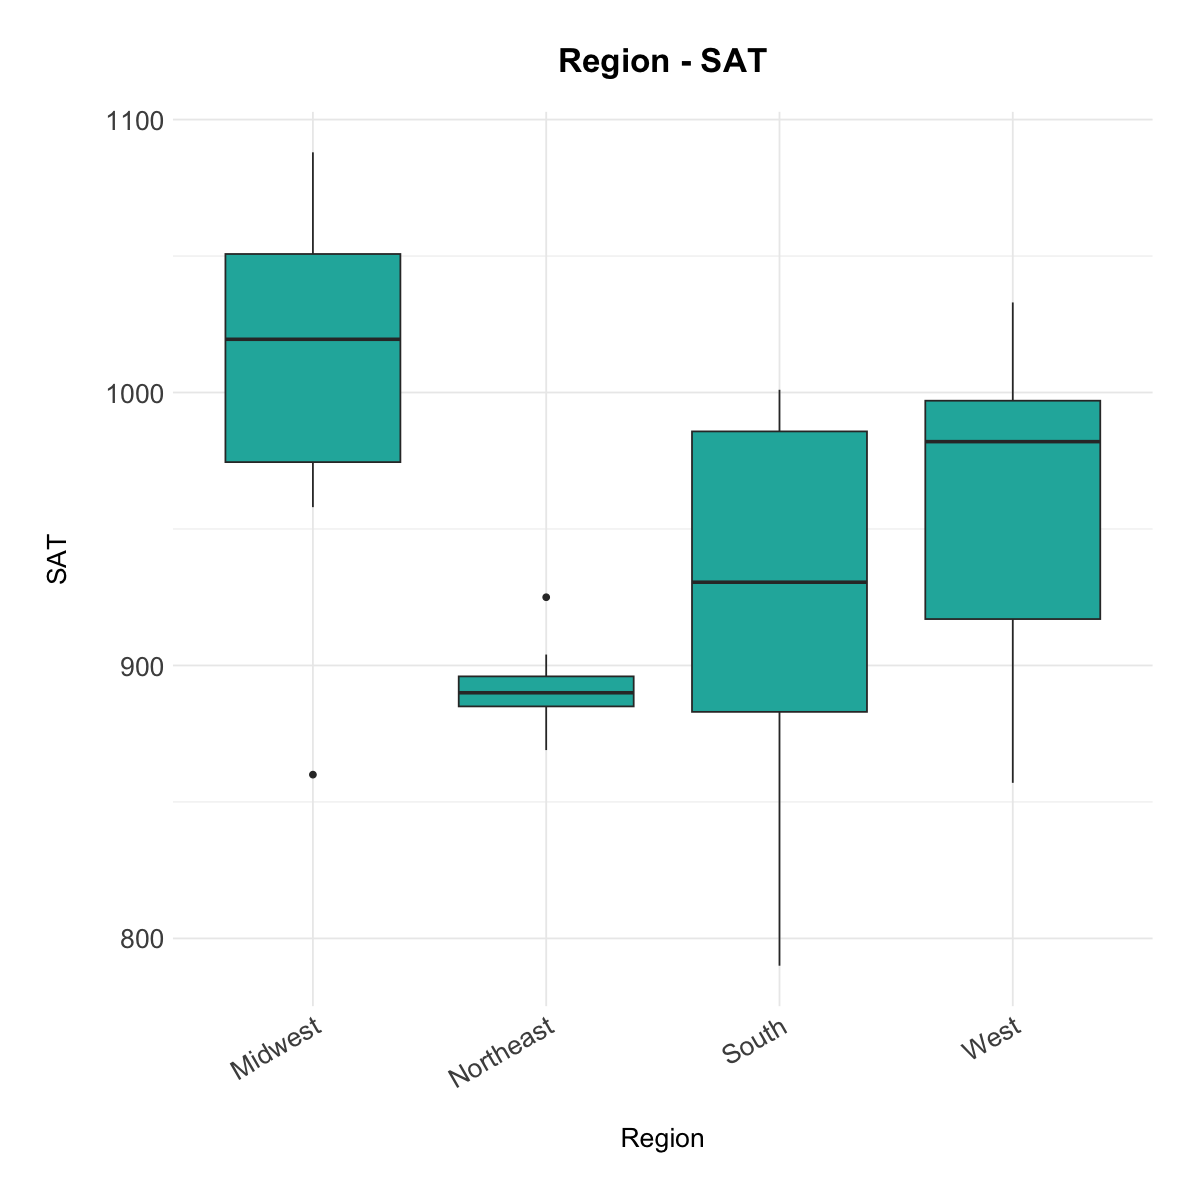

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df, aes(x = Region, y = SAT)) +
    geom_boxplot(fill = "lightseagreen") +
    theme +
    labs(title = "Region - SAT")


When dividing the data by a big region, the variance is pretty high. We are going to study the SAT scores by state.

Alaska and Hawaii are going to be shown on the bottom left side of the plot.


Warning message:
"package 'usmap' was built under R version 4.3.3"


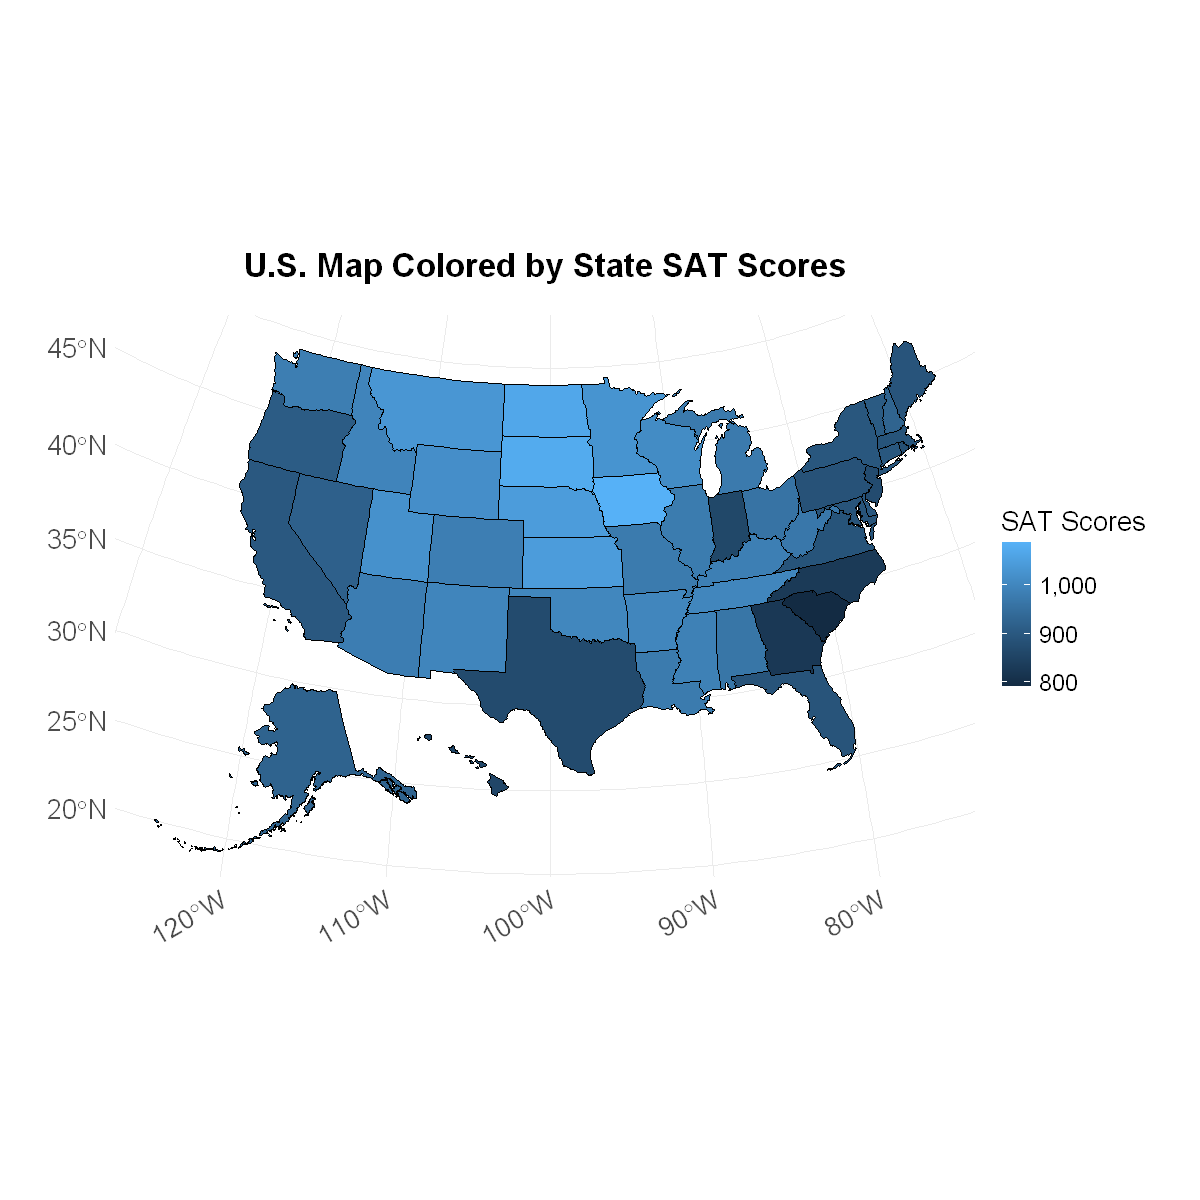

In [16]:
library(usmap)

df$state <- tolower(df$State)

plot_usmap(data = df, values = "SAT") +
    scale_fill_continuous(name = "SAT Scores", label = scales::comma) +
    theme(legend.position = "right") +
    labs(title = "U.S. Map Colored by State SAT Scores") +
    theme


Now we are going to plot the best and worst states in terms of SAT scores.


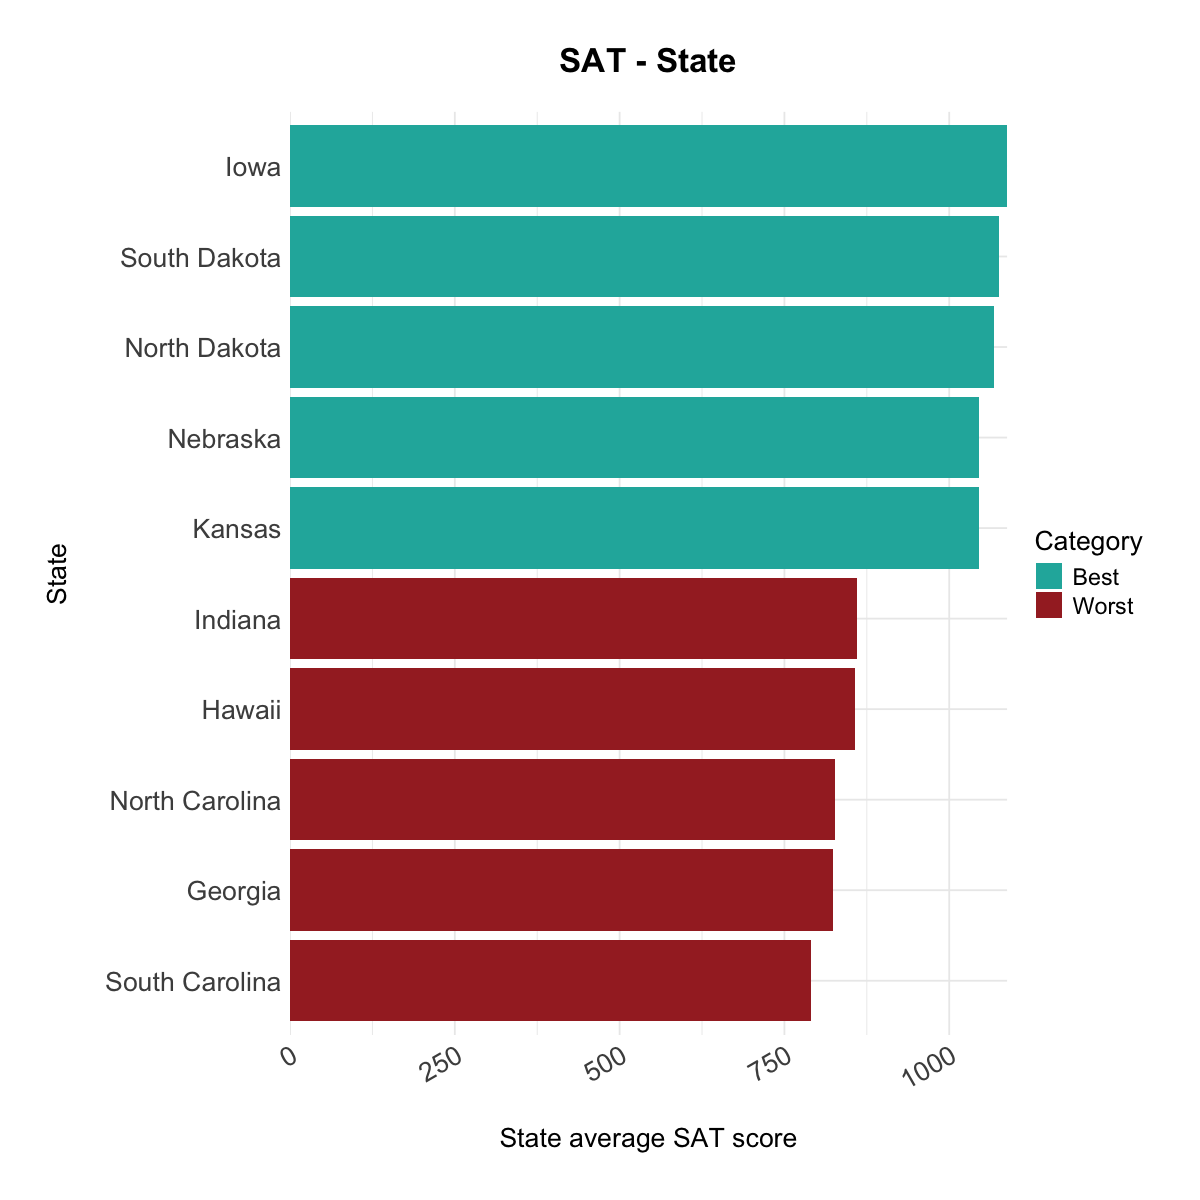

In [16]:
df_top_bottom <- df %>%
    arrange(desc(SAT)) %>%
    mutate(Category = ifelse(row_number() <= 5, "Best", ifelse(row_number() > n() - 5, "Worst", "Other"))) %>%
    filter(Category %in% c("Best", "Worst"))

ggplot(df_top_bottom, aes(y = reorder(State, SAT), x = SAT, fill = Category)) +
    geom_bar(stat = "identity") +
    scale_x_continuous(expand = c(0, 0)) +
    scale_fill_manual(values = c("Best" = "lightseagreen", "Worst" = "brown")) +
    labs(x = "State average SAT score", y = "State", title = "SAT - State", fill = "Category") +
    theme


Now, we are going to study the correlation between the SAT scores and the other variables by plotting a pairplot.


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



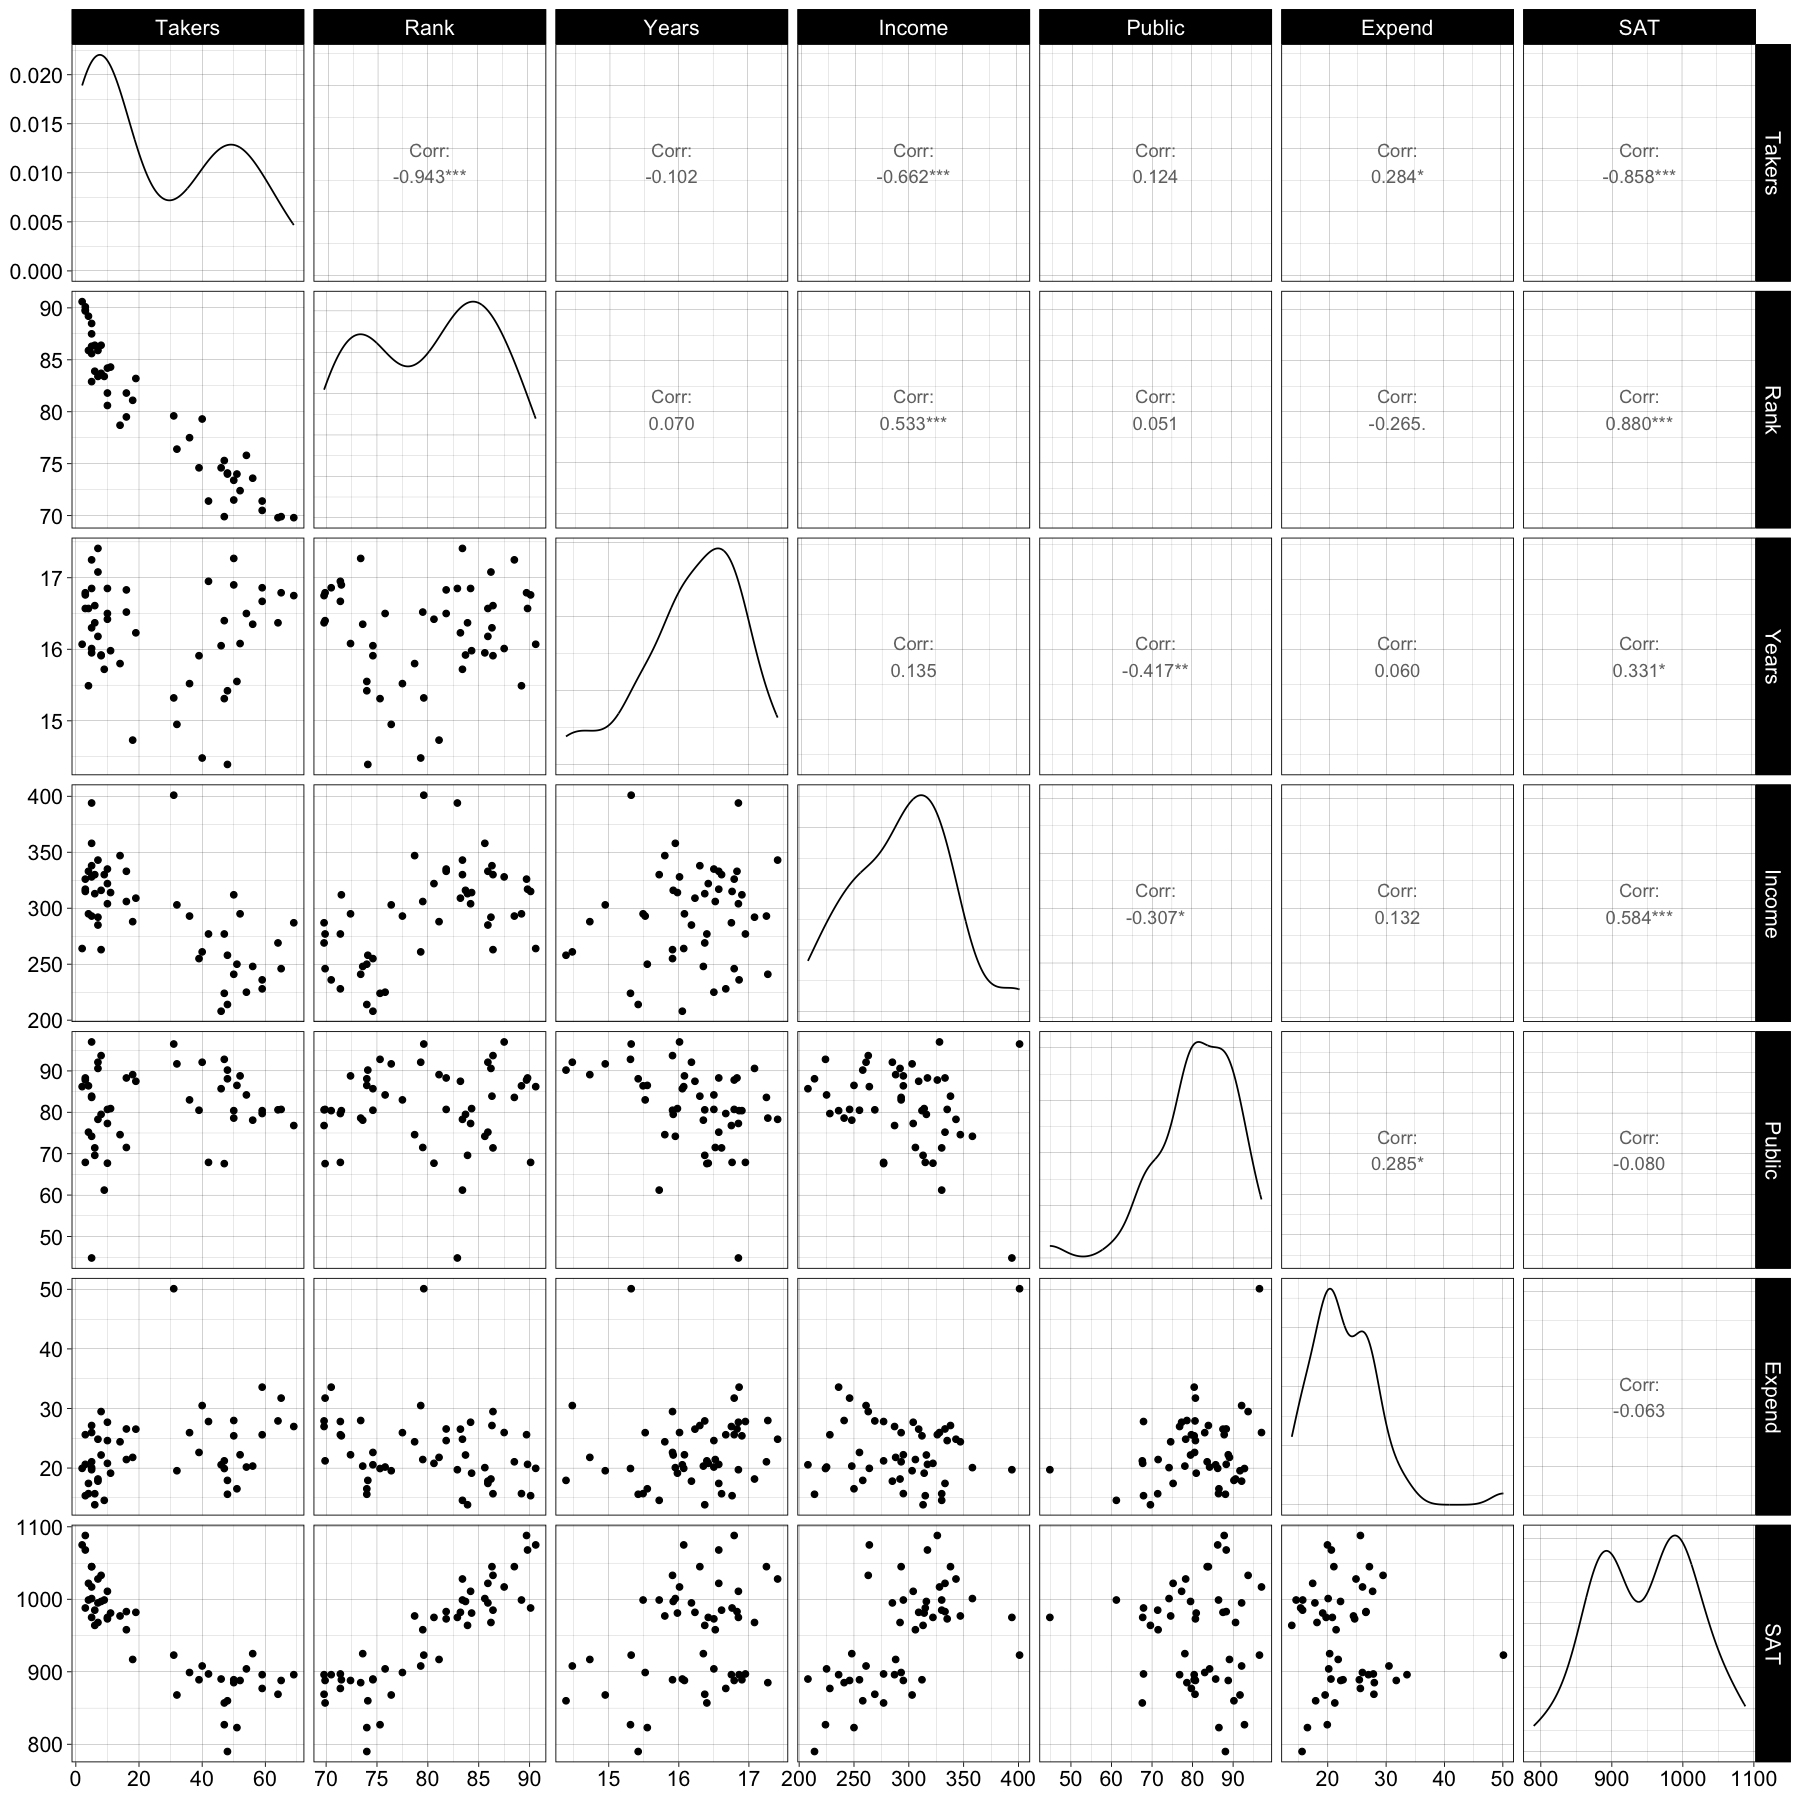

In [17]:
if (!"GGally" %in% installed.packages()) {
    install.packages("GGally")
}
library(GGally)


options(repr.plot.width = 15, repr.plot.height = 15)
plot <- ggpairs(df, columns = c("Takers", "Rank", "Years", "Income", "Public", "Expend", "SAT"))

plot + theme_linedraw() + theme(text = element_text(size = 16))


Right away we may see the high correlation between `SAT` and `Rank`, and on the scatterplot it's almost linear. Also, the relationship between `Takers` and `Rank` is very strong and seems linear by the scatterplot.


## Task 2


Choose one numeric variable as a regressor.

- Using a linear regression model or its variants (quadratic regression, ...), investigate the dependence of the explained variable on this regressor.
- Display the results graphically.
- Practically interpret the values of the estimates of the regression coefficients.
- Assess the quality of the model - does the regressor you have chosen explain the behaviour of the explained variable well?


### Linear Regression: SAT vs Rank


#### **Model training**


To complete this task, we are going to choose the Rank variable as a regressor and the SAT variable as the explained variable.


In [18]:
fit_Rank <- lm(SAT ~ Rank, data = df)

summary(fit_Rank)



Call:
lm(formula = SAT ~ Rank, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.707  -21.306    6.611   22.648   47.448 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  183.419     59.781   3.068  0.00354 ** 
Rank           9.558      0.745  12.830  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34.02 on 48 degrees of freedom
Multiple R-squared:  0.7742,	Adjusted R-squared:  0.7695 
F-statistic: 164.6 on 1 and 48 DF,  p-value: < 2.2e-16


#### **Plotting the regression line**


Warning message in predict.lm(fit_Rank, interval = "prediction"):
"predictions on current data refer to _future_ responses
"


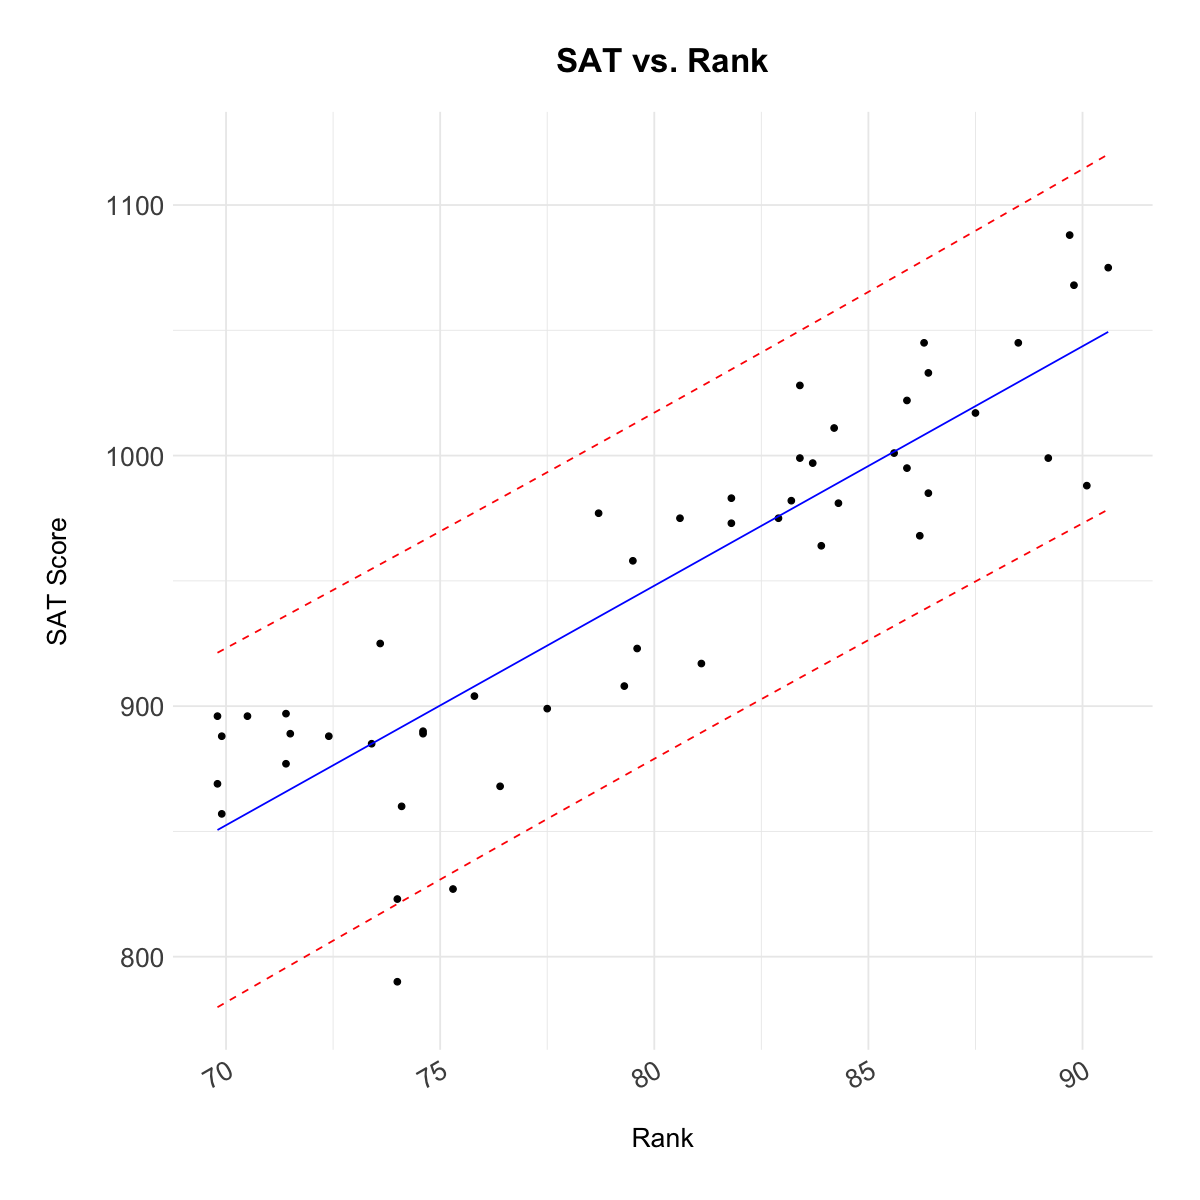

In [19]:
options(repr.plot.width = 10, repr.plot.height = 10)

tmp <- predict(fit_Rank, interval = "prediction")
df.slope <- cbind(df, tmp)
ggplot(df.slope, aes(x = Rank, y = SAT)) +
    geom_point() +
    theme +
    geom_line(aes(y = fit), color = "blue") +
    geom_line(aes(y = lwr), linetype = "dashed", color = "red") +
    geom_line(aes(y = upr), linetype = "dashed", color = "red") +
    labs(
        title = "SAT vs. Rank",
        x = "Rank",
        y = "SAT Score"
    )


#### **Coefficient estimates**

The SAT score is expected to increase by approximately 9.558 points for every one percentile increase in Rank. This means that the difference 10 in Rank corresponds to around 95.58 points in SAT score, which is quite significant. For example, it is greater than a difference between **50%** and **80%** quantiles of the SAT scores.


In [20]:
quantile(df$SAT, probs = c(0.5))
quantile(df$SAT, probs = c(0.8))


50% 
966

80% 
1003

#### **Model quality assessment**

**Statistical Significance**

- **Highly significant p-value for Rank and less significant for Intercept** suggest a real effect of the Rank on SAT scores.

**Residuals**

- Residual analysis shows that the model's **predictions are close to actual values**, with some outliers indicated by the maximum residual 47.448.

**Residual Standard Error**

- **The residual standard error is 34.02**, which means that the typical difference between the observed SAT scores and the predicted SAT scores by the regression model is approximately 34.02 points, suggests that **the model may provide reasonably accurate predictions** of SAT scores

**$R^2$ and Adjusted $R^2$**

- **76,95% of the variability** in SAT scores is **explained by the Rank**, indicating a good model fit.

**F-statistic**

- A small p-value (typically < 0.05) indicates that the regression model as a whole is **statistically significant**, with an F-statistic indicating that Rank significantly predicts SAT scores.

**Summary**: Overall, these findings provide evidence that states with higher percentile rankings tend to have higher SAT scores, supporting the presence of a positive linear relationship between Rank and SAT scores.


## Task 3


Choose one categorical variable as a regressor.

- Use the analysis of variance model to examine the dependence of the explained variable on this regressor.
- Practically interpret the value of the regression coefficients.
- Evaluate the quality of the model.


Let's define a new categorical variable `Income_Category` based on the `Income` variable.


In [21]:
income_33rd <- quantile(df$Income, 0.33)
income_66th <- quantile(df$Income, 0.66)

df$Income_Category <- cut(df$Income,
    breaks = c(min(df$Income) - 1, income_33rd, income_66th, max(df$Income)),
    labels = c("Low", "Medium", "High"),
    include.lowest = TRUE
)

head(df[, c("State", "Income", "Income_Category")])


,State,Income,Income_Category
,<fct>,<int>,<fct>
1,Iowa,326,High
2,South Dakota,264,Low
3,North Dakota,317,High
4,Kansas,338,High
5,Nebraska,293,Medium
6,Montana,263,Low


Here is the scatter plot of SAT scores by Income Category:


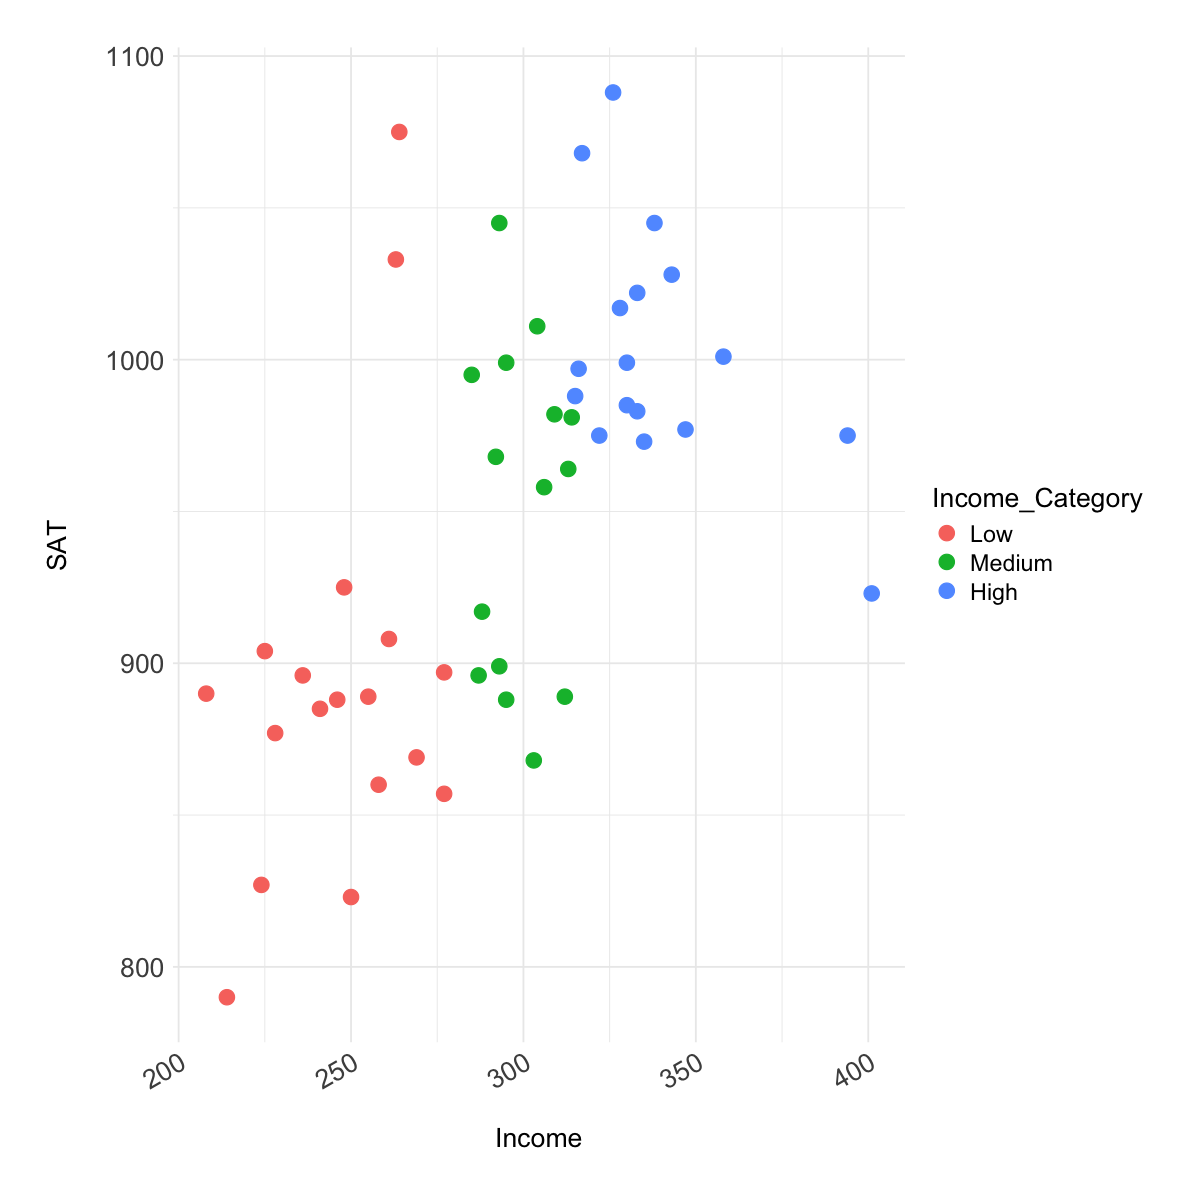

In [22]:
ggplot(df, aes(x = Income, y = SAT, color = Income_Category)) +
    geom_point(size = 4) +
    theme


And the boxplot:


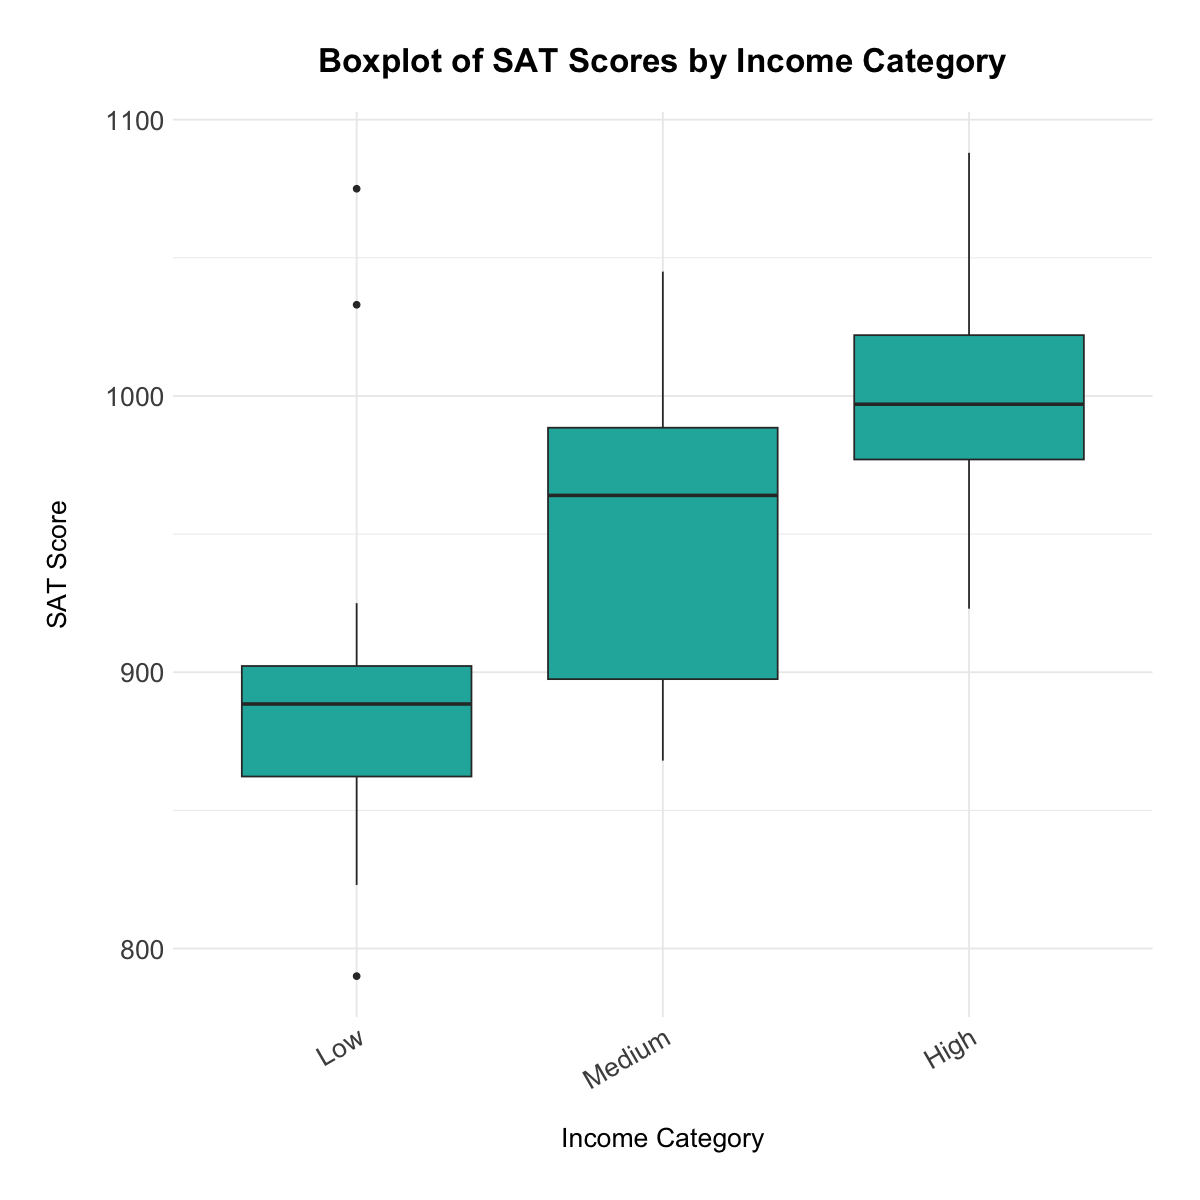

In [23]:
ggplot(df, aes(x = Income_Category, y = SAT)) +
    geom_boxplot(fill = "lightseagreen") +
    labs(
        title = "Boxplot of SAT Scores by Income Category",
        x = "Income Category",
        y = "SAT Score"
    ) +
    theme


The count of the individual categories is as follows:


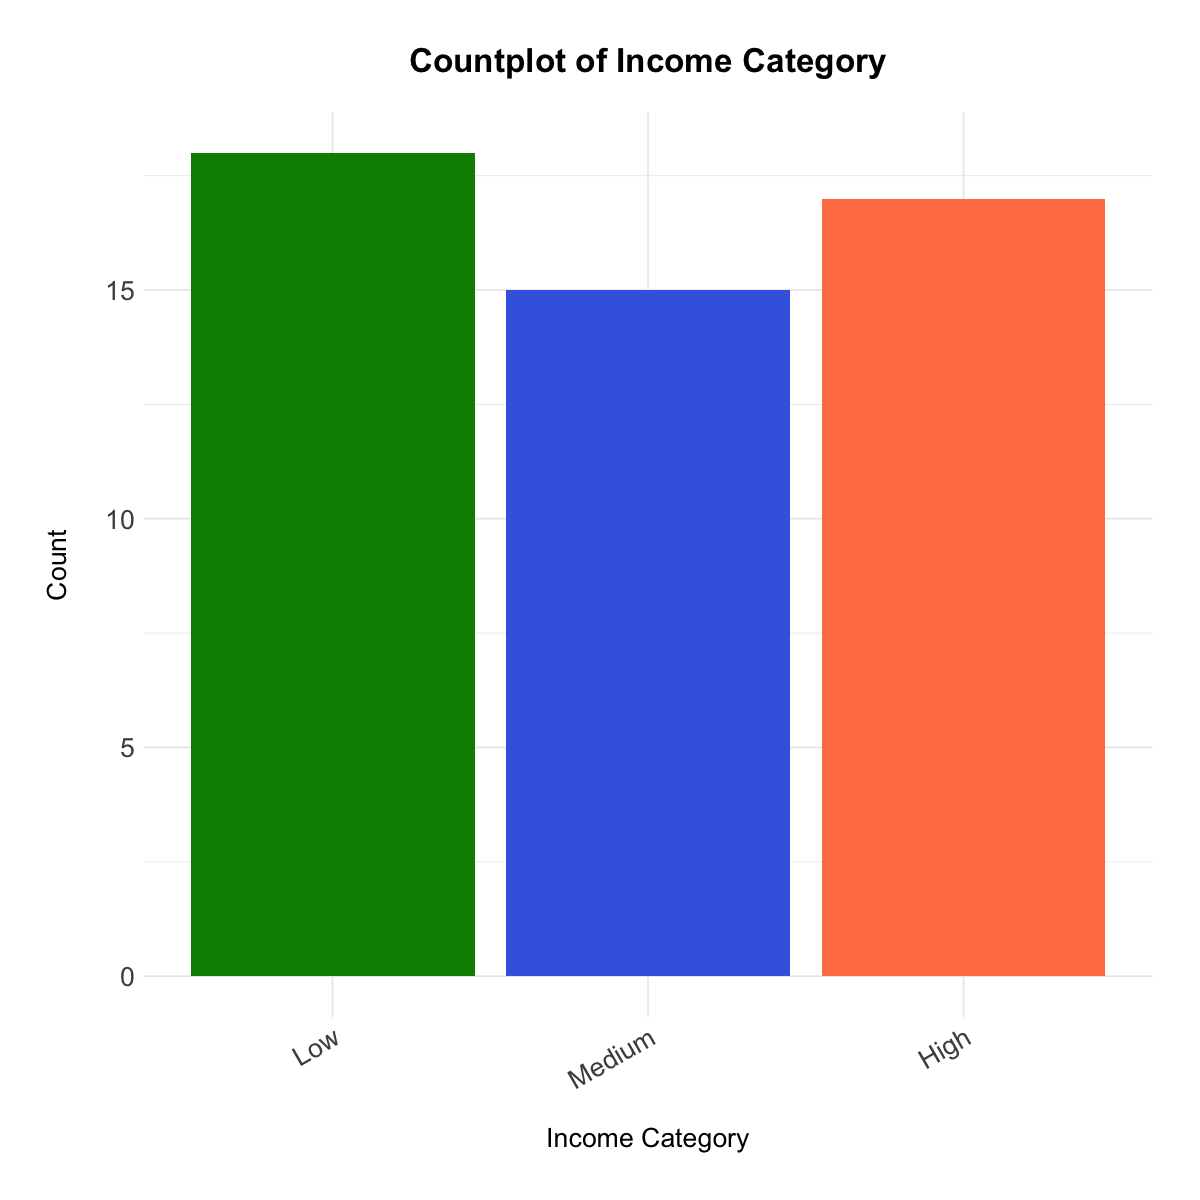

In [24]:
ggplot(df, aes(x = Income_Category, fill = Income_Category)) +
    geom_bar() +
    scale_fill_manual(values = c("Low" = "green4", "Medium" = "royalblue", "High" = "coral")) +
    labs(
        title = "Countplot of Income Category",
        x = "Income Category",
        y = "Count"
    ) +
    theme +
    theme(legend.position = "none")


Here are our hypotheses for the ANOVA test:

- $H_0$: The mean SAT scores for the "Low", "Medium", and "High" income categories are equal.
- $H_A$: At least one of the mean SAT scores for the "Low", "Medium", and "High" income categories is not equal to the others.


In [25]:
anova(aov(SAT ~ Income_Category, data = df))


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Income_Category,2,103144.4,51572.212,16.96616,2.840751e-06
Residuals,47,142866.4,3039.711,NA,NA


$p$-value of Anova test is less than 0.05, so we reject the null hypothesis, prooving that the means are not equal.


Now let's fit the linear regression model to predict SAT scores based on the `Income Category`.


In [26]:
fit_Inc <- lm(SAT ~ Income_Category, data = df)
summary(fit_Inc)



Call:
lm(formula = SAT ~ Income_Category, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.056  -29.088   -4.556   23.912  180.944 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             894.06      13.00  68.799  < 2e-16 ***
Income_CategoryMedium    56.61      19.27   2.937  0.00512 ** 
Income_CategoryHigh     108.53      18.65   5.821 5.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 55.13 on 47 degrees of freedom
Multiple R-squared:  0.4193,	Adjusted R-squared:  0.3946 
F-statistic: 16.97 on 2 and 47 DF,  p-value: 2.841e-06


### Coefficients:

- **Intercept**: The intercept value of 894.06 represents the expected mean SAT score for the baseline category("Low" income).

- **Medium** income: The coefficient value of 56.61 indicates that states in the "Medium" category have an average SAT score that is 56.61 points higher.

- **High** income: Similarly, the coefficient of 108.53 for the "High" category suggests that states in this category have an average SAT score that is 108.53 points higher than states in the "Low" income category.

### Statistical Significance:

- The p-values associated with the coefficients for both "Medium" and "High" income categories indicate that these differences are statistically significant. This means we have sufficient evidence to reject the null hypothesis that there's no difference in SAT scores across income categories.

### Practical Interpretation:

**Income level has a significant impact on SAT score**, with higher income levels associated with higher SAT scores. This finding underscores the potential influence of socioeconomic factors on educational outcomes, such as standardized test performance. However, since the **R-squared value is less than 50%**, it's clear that **other factors** not accounted for in this model also **play a significant role** in determining SAT scores.


## Task 4


Consider a regression model containing both regressors from the previous sections, including their interaction.

- Estimate its parameters and interpret them.
- Explore the significance of each component.
- Graphically display the regression relationship appropriately.


We are going to fit a linear regression model with both `Rank` and `Income Category` as regressors, including their interaction term.


Here is the `Rank*Income_Category` model:


In [71]:
fit_Rank_star_Inc <- lm(SAT ~ Rank * Income_Category, data = df)
summary(fit_Rank_star_Inc)



Call:
lm(formula = SAT ~ Rank * Income_Category, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.230 -14.988   4.482  23.572  44.266 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 177.043    110.550   1.601    0.116    
Rank                          9.570      1.472   6.503 6.15e-08 ***
Income_CategoryMedium       153.204    161.992   0.946    0.349    
Income_CategoryHigh         133.990    230.752   0.581    0.564    
Rank:Income_CategoryMedium   -1.902      2.073  -0.918    0.364    
Rank:Income_CategoryHigh     -1.390      2.810  -0.495    0.623    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.73 on 44 degrees of freedom
Multiple R-squared:  0.7965,	Adjusted R-squared:  0.7734 
F-statistic: 34.44 on 5 and 44 DF,  p-value: 3.742e-14


Warning message in predict.lm(fit_Rank_star_Inc, interval = "prediction"):
"predictions on current data refer to _future_ responses
"


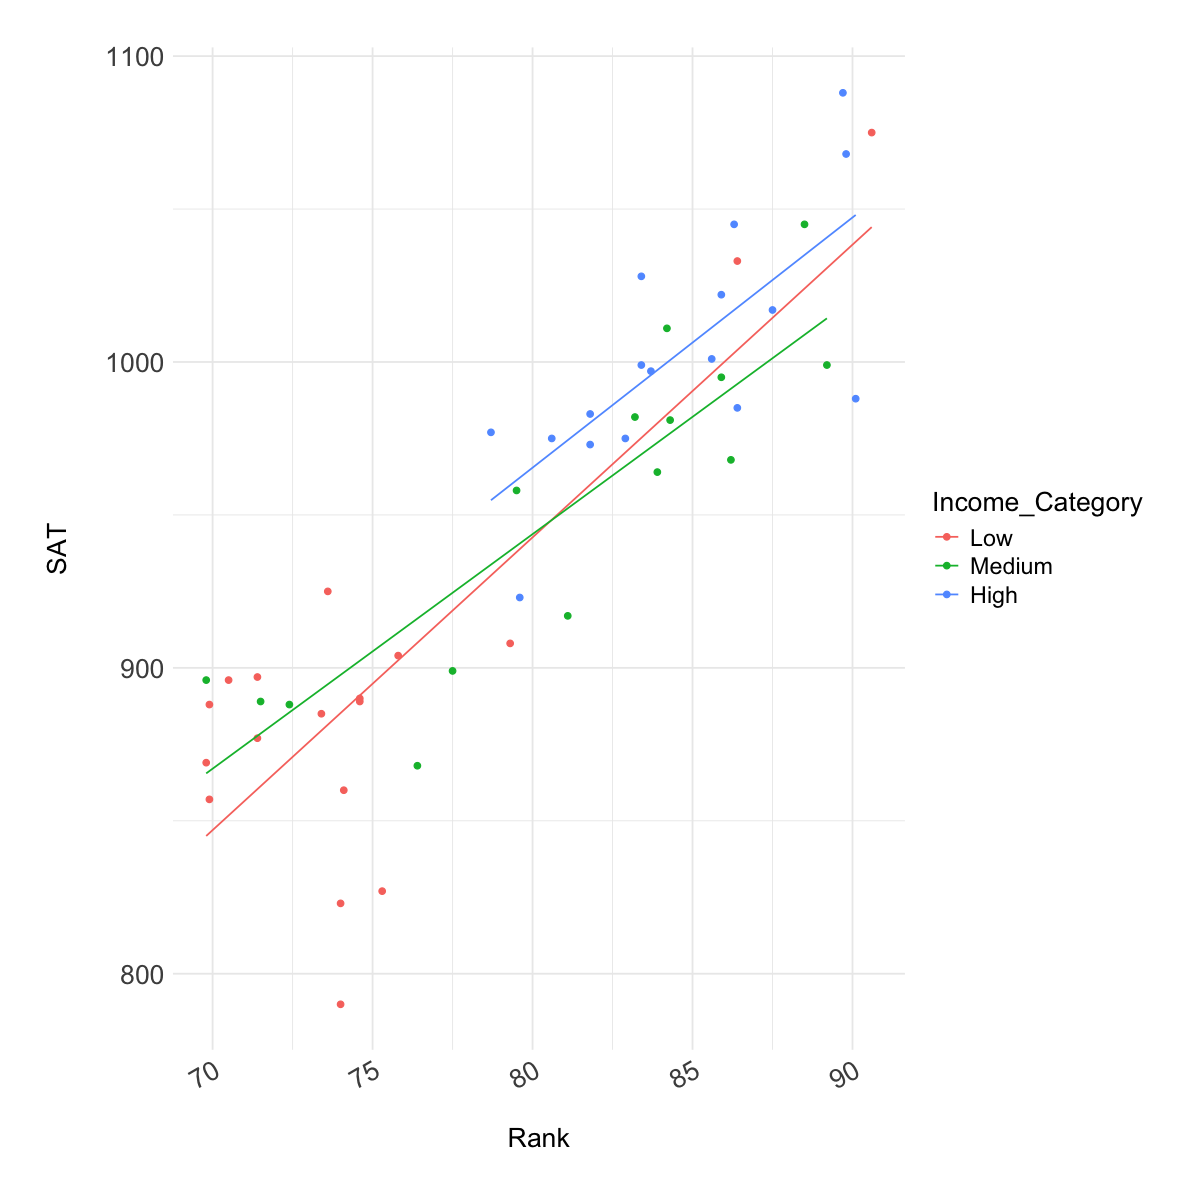

In [72]:
tmp <- predict(fit_Rank_star_Inc, interval = "prediction")
df.slope <- cbind(df, tmp)
ggplot(df.slope, aes(x = Rank, y = SAT, group = Income_Category, color = Income_Category)) +
    geom_point() +
    theme +
    geom_line(aes(y = fit))


#### **Intercept**

The intercept value of 177.043 is the estimated mean SAT score when the `Rank` is zero and for the baseline category "Low". The intercept **is significant** with a p-value of 6.15e-08.

#### **Rank and Income Category**

The coefficient for **`Rank`** is **9.570**, indicating that for each unit increase in `Rank`, the SAT score is expected to increase by 9.57 points, holding the `Income_Category` constant at the baseline. This effect **is not statistically significant** (p > 0.05).

**Income_CategoryMedium**: The coeficient for the "Medium" income category is 153.204, but **it's not statistically significant** (p = 0.349). This is the estimated difference in SAT score for this category (when the `Rank` is zero and for the category "Medium") compared to the "Low" category when Rank is zero.

**Income_CategoryHigh**: The coeficient for the "High" income category is 133.990, but **it's not statistically significant** (p = 0.564). This is the estimated difference in SAT score for this category (when the `Rank` is zero and for the category "High") compared to the "Low" category when Rank is zero.

**Income_Category: Medium**: The interaction term for `Rank` and the "Medium" income category is -1.902, but **it's not statistically significant** (p = 0.364). This suggests that the slope of the `Rank` effect on SAT scores **does not differ significantly between the "Low" and "Medium"** income categories.

**Income_Category: High**: The interaction term for `Rank` and the "High" income category is -1.390, which is **not statistically significant** (p = 0.623). This suggests that the `Rank` have **almost no effect on SAT scores in the "High" income category** compared to the "Low" category.

#### **Model Quality**

**Residual standard error**: The residual standard error of **33.35 on 46 degrees of freedom** which is the typical distance of the data points from the fitted line.

**Multiple R-squared**: The R-squared value of 0.7965 indicates that about **79.65%** of the variability in SAT scores is explained by the model, which is quite high, suggesting a good fit.

**Adjusted R-squared**: Adjusted for the number of predictors, the adjusted R-squared of **0.7734** still suggests a strong model fit.

**F-statistic**: The F-statistic of 34.44 with a p-value near zero indicates that the **model is statistically significant**, meaning the model provides a better fit to the data than a model with no predictors.

#### **Summary**:

Overall this model has higher accuracy of prediction than the previous model with only `Rank`, with a higher R-squared value and a lower residual standard error.


### Other type of interaction

Here is the `Rank + Rank:Income_Category` model:


In [73]:
fit_Rank_Inc <- lm(SAT ~ Rank + Rank:Income_Category, data = df)
summary(fit_Rank_Inc)



Call:
lm(formula = SAT ~ Rank + Rank:Income_Category, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.622 -19.816   4.078  24.453  47.137 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                256.99393   74.21381   3.463  0.00117 ** 
Rank                         8.50849    0.99096   8.586 4.11e-11 ***
Rank:Income_CategoryMedium   0.06035    0.16603   0.363  0.71791    
Rank:Income_CategoryHigh     0.30977    0.17882   1.732  0.08993 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.35 on 46 degrees of freedom
Multiple R-squared:  0.792,	Adjusted R-squared:  0.7784 
F-statistic: 58.38 on 3 and 46 DF,  p-value: 1.019e-15


After fitting the model, here is the graphical representation of the regression relationship:


Warning message in predict.lm(fit_Rank_Inc, interval = "prediction"):
"predictions on current data refer to _future_ responses
"


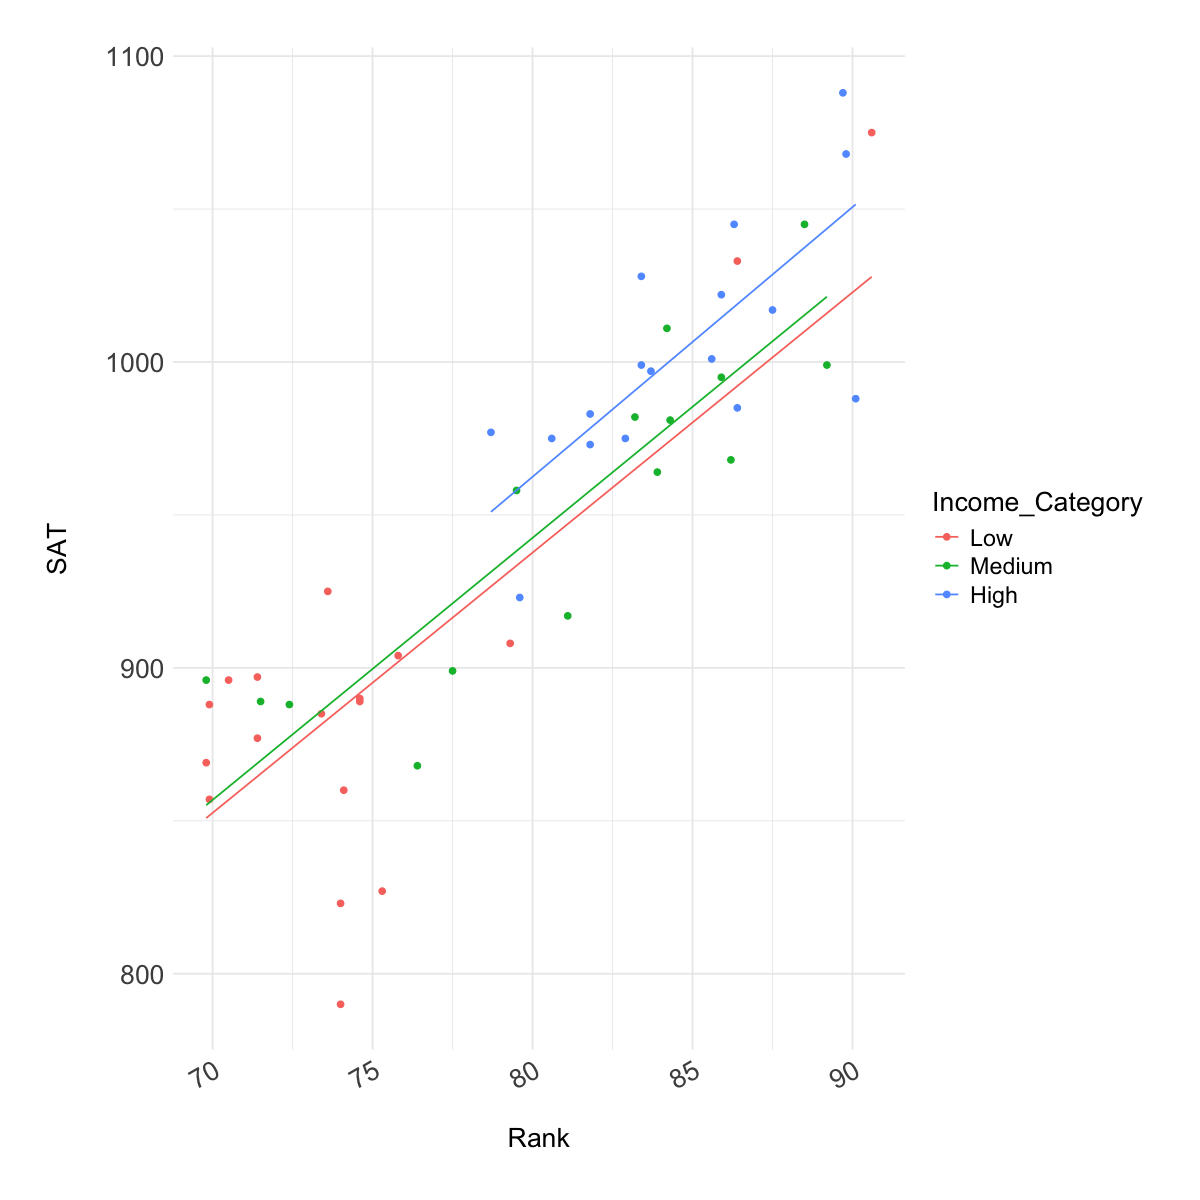

In [74]:
tmp <- predict(fit_Rank_Inc, interval = "prediction")
df.slope <- cbind(df, tmp)
ggplot(df.slope, aes(x = Rank, y = SAT, group = Income_Category, color = Income_Category)) +
    geom_point() +
    theme +
    geom_line(aes(y = fit))


#### **Intercept**

The intercept value of 256.99393 is the estimated mean SAT score when the `Rank` is zero and for the baseline category "Low". The intercept **is significant** with a p-value of 0.00117.

#### **Rank and Income Category**

The coefficient for **`Rank`** is **8.50849**, indicating that for each unit increase in `Rank`, the SAT score is expected to increase by 8.51 points, holding the `Income_Category` constant at the baseline. This effect **is statistically significant** (p < 0.05).

**Income_Category: Medium**: The interaction term for `Rank` and the "Medium" income category is 0.06035, but **it's not statistically significant** (p = 0.71791). This suggests that the slope of the `Rank` effect on SAT scores **does not differ significantly between the "Low" and "Medium"** income categories.

**Income_Category: High**: The interaction term for `Rank` and the "High" income category is 0.30977, which is **marginally significant** (p = 0.08993). This implies a trend where the `Rank` might have a **slightly different effect on SAT scores in the "High" income category** compared to the "Low" category, although this effect is not strong enough to be considered significant at the usual 0.05 level.

#### **Model Quality**

**Residual standard error**: The residual standard error of **33.35 on 46 degrees of freedom** which is the typical distance of the data points from the fitted line.

**Multiple R-squared**: The R-squared value of 0.792 indicates that about **79.2%** of the variability in SAT scores is explained by the model, which is quite high, suggesting a good fit.

**Adjusted R-squared**: Adjusted for the number of predictors, the adjusted R-squared of **0.7784** still suggests a strong model fit.

**F-statistic**: The F-statistic of 58.38 with a p-value near zero indicates that the **model is statistically significant**, meaning the model provides a better fit to the data than a model with no predictors.

#### **Summary**:

This model prooves to be better than the previous model with `Rank*Income_category`, with more siginificant coeficients and a higher R-squared value.


## Task 5


Consider a model with the previous two regressors and at least one other regressor from the data set under study.

- Explore which regressors are significant and which are not for the model.
- Using appropriate tools, try to find a suitable final model that explains the behaviour of the variable under study well but does not contain insignificant components.
- Explain your procedure and justify your choice.
- Interpret the resulting model practically.


We are going to use 3 regressors: `Rank`, `Income Category`, and `Takers`.


In [75]:
fit_Rank_Inc_Take <- lm(SAT ~ Rank + Income_Category + Takers, data = df)
summary(fit_Rank_Inc_Take)



Call:
lm(formula = SAT ~ Rank + Income_Category + Takers, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.292 -19.994   3.433  22.789  46.632 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)           337.2205   202.2256   1.668  0.10235   
Rank                    7.6359     2.2694   3.365  0.00157 **
Income_CategoryMedium   3.2434    14.0058   0.232  0.81792   
Income_CategoryHigh    22.6398    16.8402   1.344  0.18556   
Takers                 -0.3330     0.7569  -0.440  0.66203   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.61 on 45 degrees of freedom
Multiple R-squared:  0.7934,	Adjusted R-squared:  0.775 
F-statistic:  43.2 on 4 and 45 DF,  p-value: 7.362e-15


Let's see the Akaike Information Criterion (AIC) for our model.


In [76]:
AIC(fit_Rank)
AIC(fit_Inc)
AIC(fit_Rank_Inc)
AIC(fit_Rank_Inc_Take)


[1] 498.5351

[1] 547.776

[1] 498.4418

[1] 500.1071

The AIC values suggest that adding `Take` does not improve the model significantly, as AIC of `Rank + Income Category` is almost the same as AIC of `Rank + Income Category + Takers`. Let's try other features.


In [77]:
drop1(lm(SAT ~ Takers + Income + Years + Public + Expend + Rank + Region, data = df), test = "F")


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,19536.79,318.4016,NA,NA
Takers,1,205.7164,19742.50,316.9253,0.4211878,0.5200540166
Income,1,745.0194,20281.81,318.2728,1.5253674,0.2240146626
Years,1,3922.4733,23459.26,325.5499,8.0309490,0.0071729790
Public,1,206.6440,19743.43,316.9277,0.4230870,0.5191195561
Expend,1,466.6406,20003.43,317.5818,0.9554092,0.3342210611
Rank,1,7920.0926,27456.88,333.4174,16.2157534,0.0002452103
Region,3,10305.6307,29842.42,333.5832,7.0333170,0.0006590696


Judging by that table, `Rank` and `Region` appear to be the strongest predictors, `Years` also seems important as it has a low p-value and significant F-value. Let's fit the model with only these features.


In [78]:
drop1(lm(SAT ~ Years + Rank + Region, data = df), test = "F")


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,24502.38,321.7251,NA,NA
Years,1,11155.84,35658.22,338.4856,20.033021,5.325593e-05
Rank,1,95758.84,120261.23,399.2699,171.958326,8.407271e-17
Region,3,13123.46,37625.84,337.1712,7.855456,2.635171e-04


Now, let's see the interaction terms.


In [79]:
drop1(lm(SAT ~ Years:Rank + Years:Region + Rank:Region, data = df), test = "F")


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,27159.40,330.8728,NA,NA
Years:Rank,1,101774.047,128933.44,406.7514,157.386038,8.533815e-16
Years:Region,3,3526.961,30686.36,330.9775,1.818061,1.585494e-01
Rank:Region,3,2717.583,29876.98,329.6410,1.400847,2.558852e-01


- The `Years:Rank` interaction is highly significant and critical for modeling SAT scores, removing it worsens the model substantially.
- The interactions `Years:Region` and `Rank:Region` are not so significant.

We are going to fit lm's with different combinations of features and interactions to see which one is the best.


In [80]:
fit_Years_Rank_Region <- lm(SAT ~ Years + Rank + Region, data = df)
fit_Years_Rank_Region_Star <- lm(SAT ~ Years * Rank * Region, data = df)
fit_Years_Rank_Region_2 <- lm(SAT ~ Years + Rank + Region + Years:Rank, data = df)
summary(fit_Years_Rank_Region)
summary(fit_Years_Rank_Region_Star)
summary(fit_Years_Rank_Region_2)



Call:
lm(formula = SAT ~ Years + Rank + Region, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.318 -10.794  -0.468  16.791  54.774 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -147.9203    92.3015  -1.603    0.116    
Years             24.4658     5.4662   4.476 5.33e-05 ***
Rank               8.9967     0.6861  13.113  < 2e-16 ***
RegionNortheast  -15.1217    13.4583  -1.124    0.267    
RegionSouth      -42.7795     9.4407  -4.531 4.45e-05 ***
RegionWest       -15.1011     9.8949  -1.526    0.134    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.6 on 44 degrees of freedom
Multiple R-squared:  0.9004,	Adjusted R-squared:  0.8891 
F-statistic: 79.55 on 5 and 44 DF,  p-value: < 2.2e-16



Call:
lm(formula = SAT ~ Years * Rank * Region, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.137 -10.599  -2.641   9.609  40.681 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)  
(Intercept)                -2.473e+03  2.046e+03  -1.208   0.2352  
Years                       1.603e+02  1.267e+02   1.265   0.2144  
Rank                        4.044e+01  2.591e+01   1.561   0.1278  
RegionNortheast            -1.001e+04  1.748e+04  -0.573   0.5706  
RegionSouth                -4.779e+03  2.607e+03  -1.833   0.0756 .
RegionWest                 -1.915e+02  5.607e+03  -0.034   0.9730  
Years:Rank                 -1.844e+00  1.597e+00  -1.155   0.2562  
Years:RegionNortheast       6.328e+02  1.055e+03   0.600   0.5524  
Years:RegionSouth           3.007e+02  1.609e+02   1.868   0.0704 .
Years:RegionWest            1.215e+01  3.461e+02   0.035   0.9722  
Rank:RegionNortheast        1.427e+02  2.385e+02   0.599   0.5534  
Rank:RegionSout


Call:
lm(formula = SAT ~ Years + Rank + Region + Years:Rank, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.869 -11.231   1.681  12.883  42.880 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4756.1704  1208.3366  -3.936 0.000298 ***
Years             308.0318    74.3421   4.143 0.000157 ***
Rank               67.6158    15.3480   4.406 6.90e-05 ***
RegionNortheast   -34.1276    12.7696  -2.673 0.010592 *  
RegionSouth       -50.4122     8.4888  -5.939 4.49e-07 ***
RegionWest        -28.3909     9.3203  -3.046 0.003951 ** 
Years:Rank         -3.5992     0.9416  -3.822 0.000421 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.62 on 43 degrees of freedom
Multiple R-squared:  0.9257,	Adjusted R-squared:  0.9153 
F-statistic: 89.24 on 6 and 43 DF,  p-value: < 2.2e-16


The third model turns out the be the best, showing that adding the interaction between `Years` and `Rank` improves the model's performance significantly without overcomplicating it.


In [81]:
AIC(fit_Years_Rank_Region)
AIC(fit_Years_Rank_Region_Star)
AIC(fit_Years_Rank_Region_2)


[1] 465.619

[1] 455.0876

[1] 452.9946

In [82]:
BIC(fit_Years_Rank_Region)
BIC(fit_Years_Rank_Region_Star)
BIC(fit_Years_Rank_Region_2)


[1] 479.0032

[1] 487.592

[1] 468.2908

Our third model, `fit_Years_Rank_Region_2`, is consistently favored by both AIC and BIC. This model, which includes main effects for `Years`, `Rank`, and `Region` and an interaction term between `Years` and `Rank`, seems to provide the best trade-off between complexity and explanatory power.


Here is interpretation of the final model's paramaters:

#### **(Intercept)**

The intercept (-4756.1704) with a very significant p-value (0.000298) indicates the baseline SAT score when all numeric predictors are zero, which is not practical for this scenario but mathematically necessary for the model. This suggests a starting value heavily adjusted by the predictors.

#### **Years**

The coefficient (308.0318) indicates that each additional year is associated with an increase of 308.03 points in the SAT score, assuming other factors are constant. This is statistically significant (p-value = 0.000157), indicating a strong positive relationship between years of study and SAT scores.

#### **Rank**

The coefficient (67.6158) shows that each increase in rank is associated with an increase of 67.62 points in SAT scores, holding other variables constant. This is also highly significant (p-value = 6.90e-05).

#### **Region**

The coefficients for regions indicate differences compared to a baseline region (likely the "Midwest" if it's not listed), adjusting for other factors:

- **RegionNortheast**: -34.1276 points relative to the baseline, significant at the 0.01 level.
- **RegionSouth**: -50.4122 points relative to the baseline, very significant (p-value = 4.49e-07).
- **RegionWest**: -28.3909 points relative to the baseline, significant at the 0.01 level.

- **Years:Rank**: The interaction term (-3.5992) suggests that the benefit of each additional year decreases as rank increases, or vice versa, with a significant effect (p-value = 0.000421).

#### **Model Quality**

- **Residual Standard Error**: 20.62 on 43 degrees of freedom, indicating the typical deviation of observed values from the predicted values.
- **Multiple R-squared**: 0.9257, showing that approximately 92.57% of the variability in SAT scores is explained by the model, which is exceptionally high.
- **Adjusted R-squared**: 0.9153, which adjusts the R-squared for the number of predictors, still indicating a strong fit.
- **F-statistic and p-value**: An F-statistic of 89.24 on 6 and 43 DF, with a p-value < 2.2e-16, confirms the model is statistically very significant as a whole.

#### **Summary**:

- The model explained approximately **92.57% of the variance** in SAT scores (Multiple R-squared: 0.9257), with an Adjusted R-squared of 0.9153, indicating a **very strong fit** and **high predictive power**.
- The overall **model is highly statistically significant** (F-statistic: 89.24 on 6 and 43 DF, p-value: < 2.2e-16), affirming the reliability of the findings.

This analysis provides insightful revelations into the factors influencing SAT performance, emphasizing the role of educational duration, institutional quality, and regional differences.


## Task 6


For the final model, use appropriate tests to verify the assumptions of the methods you have used.

In [83]:
final_model <- fit_Years_Rank_Region_2


We have several prerequisites to ensure:

- Average of residues - ideally we would expect a value around zero

- Normality of residuals - tested by normality tests and Q-Q (quantile) plot analysis, for example a Breusch-Pagan test.

- Uncorrelated residuals - check whether residuals are uncorrelated with each other. This can be checked using the Durbin-Watson test to detect autocorrelation in residuals.

- Linearity - implies that the relationship between the predictors and the response variable should be linear. This can be checked visually using scatter plots or added variable plots.

- Homoscedasticity - the residuals should have constant variance across all levels of the independent variables. This can be assessed with a Breusch-Pagan test or visually with a scale-location plot.

- Absence of Multicollinearity - it's important to ensure that predictors are not too highly correlated, which can be checked with Variance Inflation Factors (VIF) or with ols_test_correlation


### Average of residuals


In [84]:
residual_mean <- mean(resid(final_model))

print(residual_mean)


[1] 1.136868e-15


The calculated mean of the residuals from final model is is very close to zero. This indicates that, on average, the residuals are centered around zero, suggesting that model is unbiased in its predictions.


### Normality of residuals


- $H_0$: The data is normally distributed.
- $H_A$: The data is not normally distributed.


In [85]:
library(olsrr)
ols_test_normality(final_model)


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9887         0.9098 
Kolmogorov-Smirnov        0.0545         0.9966 
Cramer-von Mises          4.1867         0.0000 
Anderson-Darling          0.1742         0.9214 
-----------------------------------------------

The Shapiro-Wilk test, Kolmogorov-Smirnov test and Anderson-Darling test for normality indicate that the residuals from final model are approximately normally distributed. These p-values are significantly larger than 0.05, suggesting that we fail to reject the null hypothesis of normality.

Let's take a xloser look at Q-Q plot:


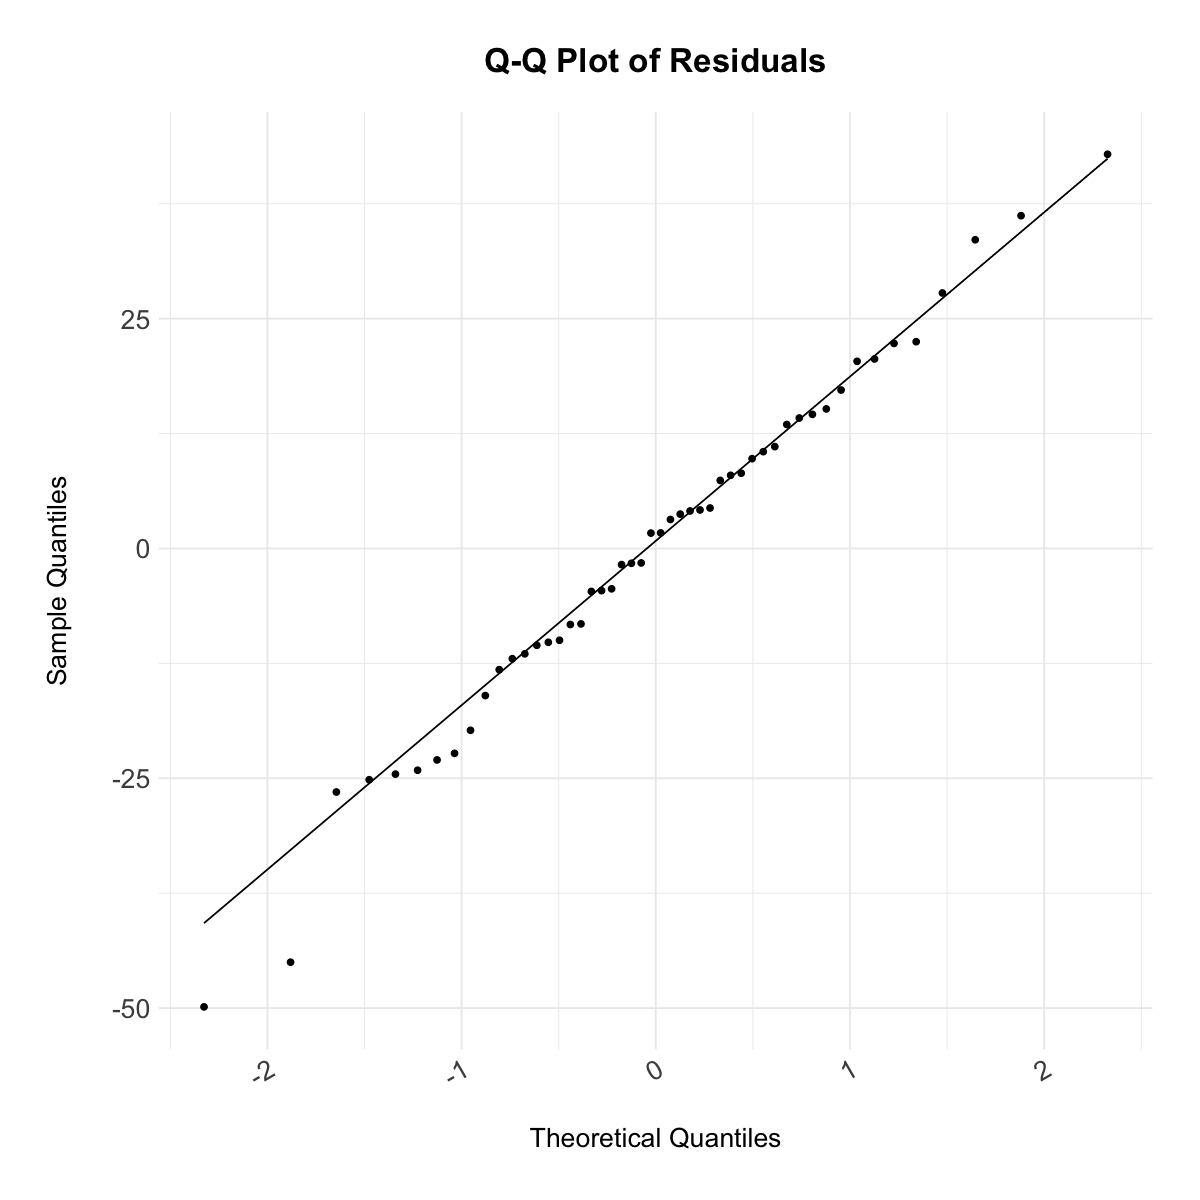

In [86]:
qq_plot <- ggplot(data.frame(Residuals = resid(final_model)), aes(sample = Residuals)) +
    geom_qq() +
    geom_qq_line() +
    labs(title = "Q-Q Plot of Residuals", x = "Theoretical Quantiles", y = "Sample Quantiles")
qq_plot +
    theme


The plot shows almost perfect similarity of our data with normal distribution in the central part. There are some deviants at the ends, but visually they do not appear significant.


### Uncorrelated Residuals


$H_0$: There is no autocorrelation present in the residuals (i.e., $\rho = 0$, where $\rho$ represents the autocorrelation coefficient).

$H_1$: There is autocorrelation present in the residuals (i.e., $\rho > 0$).


In [87]:
library(lmtest) # For Durbin-Watson test

durbin_watson <- dwtest(final_model)

print(durbin_watson)



	Durbin-Watson test

data:  final_model
DW = 1.6067, p-value = 0.03962
alternative hypothesis: true autocorrelation is greater than 0



The DW statistic is less than 2, indicating the possibility of positive autocorrelation in the residuals. The p-value is approximately 0.03962, which is less than the typical significance level of 0.05.

- Therefore, we **reject the null hypothesis** that there is no autocorrelation in the residuals.

What does it mean for our model:

- Autocorrelation can lead to inefficient estimates of the regression coefficients. Inefficient estimates mean that the coefficients may have larger standard errors, reducing the precision of the estimates and the accuracy of forecasts made using this model.
- The presence of autocorrelation suggests that the model may not capture all the relevant information in the data.
- Autocorrelation violates the assumption of independent errors, which is necessary for valid statistical inference. As a result, hypothesis tests for the significance of the regression coefficients may be unreliable, leading to incorrect conclusions.


### <img src="https://i.imgflip.com/4ke5lg.png" width=294px height=300px />


### Linearity


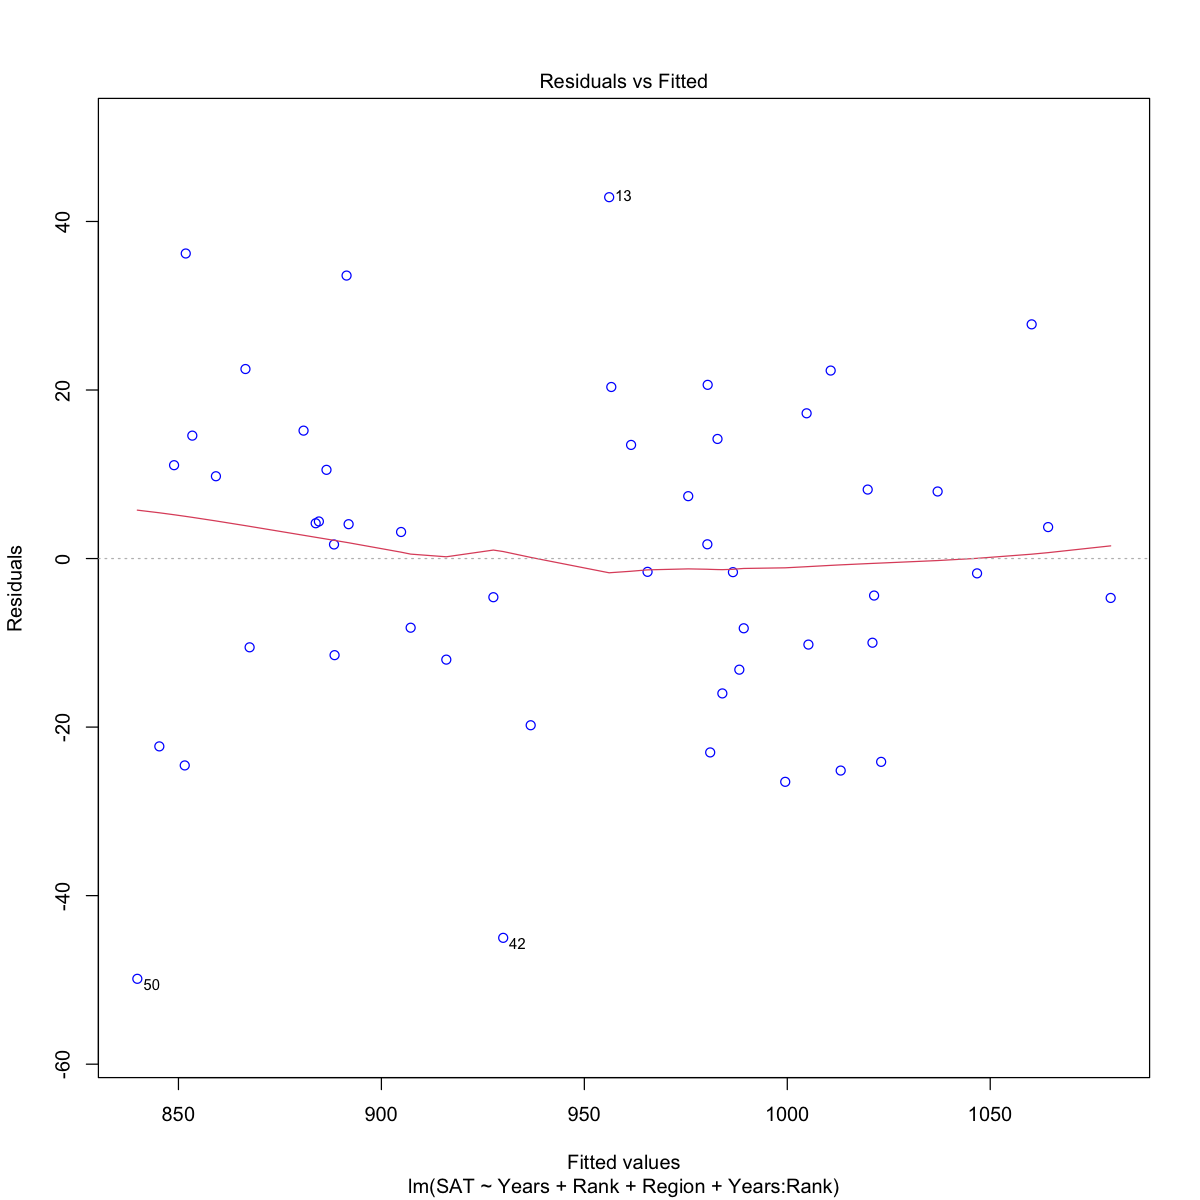

In [88]:
p1 <- plot(final_model, which = 1, col = c("blue"))


A scatterplot of residuals (vertical axis) against fitted values (horizontal axis) should ideally show a random pattern with no discernible trend. Here we can see curvature in red line in the first part of the plot (fitted values between 850 - 900).

We are going to perform a **correlation test**, which will show the correlation between the **fitted regression model residuals** and **expected values of residuals**.


In [89]:
library(olsrr)
ols_test_correlation(final_model)


[1] 0.9936586

Value 0.9936 indicate almost perfect correlation, which is good. The linearity prerequisite is almost not violated.


### Homoscedasticity


Let's explore the spread of residuals across the range of fitted values:


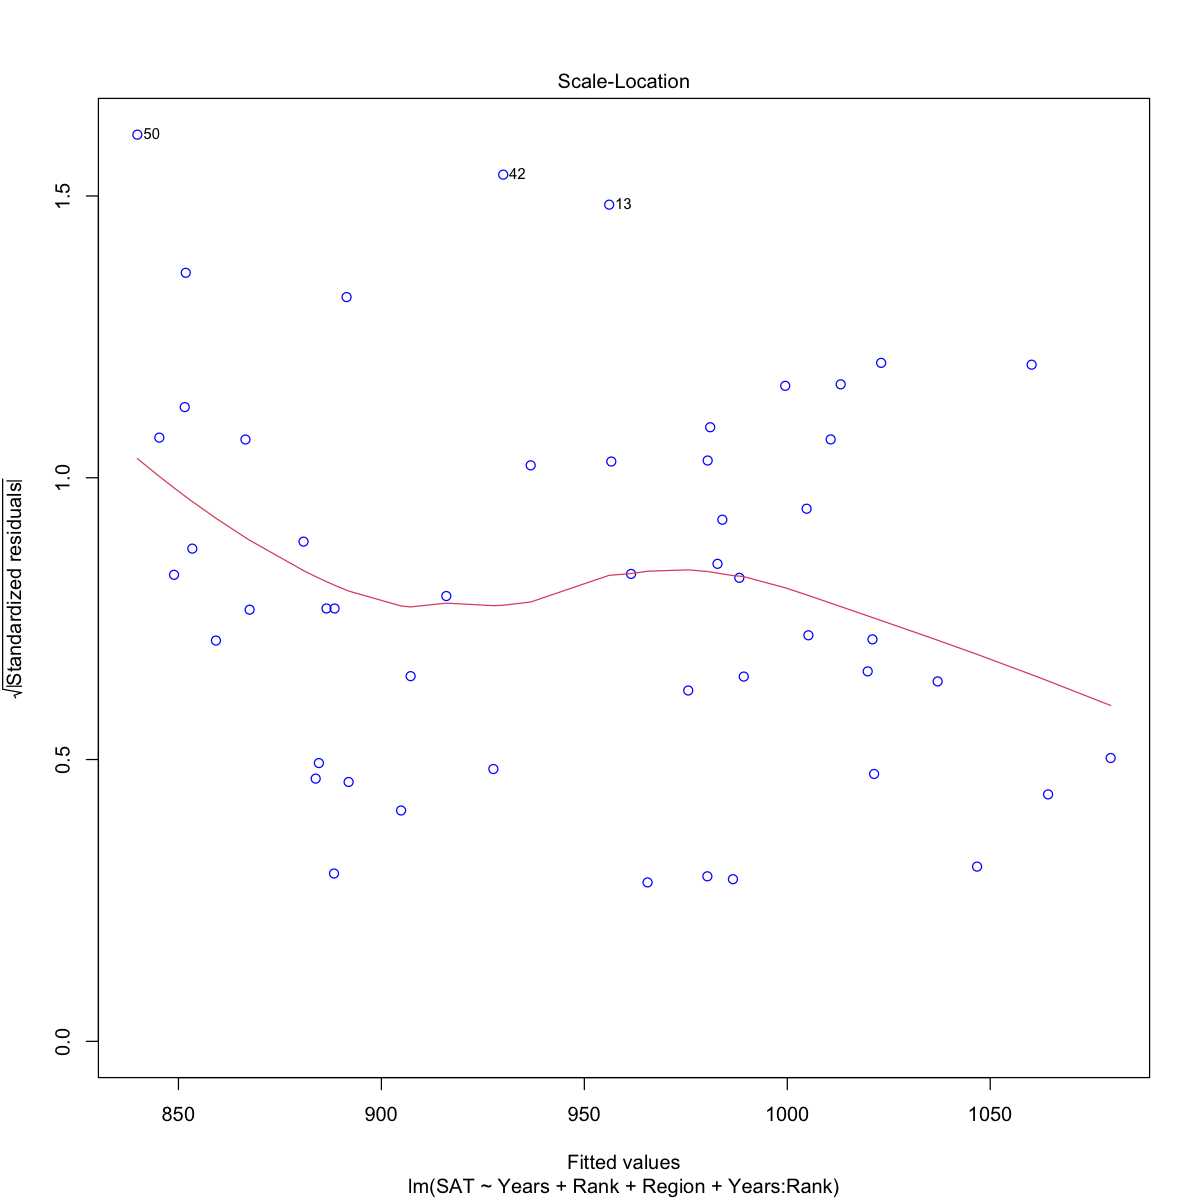

In [90]:
p1 <- plot(final_model, which = 3, col = c("blue"))


Here we can see that points in the plot do not appear to be randomly scattered around zero, and the spread of residuals slightly differs across different levels of the fitted values. Still, there are no visible trends nor systematic patterns.

Let's look at the Breusch Pagan Test for Heteroskedasticity:


In [91]:
ols_test_breusch_pagan(final_model)



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

             Data               
 -------------------------------
 Response : SAT 
 Variables: fitted values of SAT 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    2.303014 
 Prob > Chi2   =    0.1291232 

Since the p-value (0.1291232) is greater than the chosen significance level (e.g., 0.05), we **fail to reject the null hypothesis**.

Therefore, based on this test, there is no significant evidence to suggest that the variance of the residuals is not constant across different levels of the predictor variables. In other words, there is **no significant evidence of heteroskedasticity** in the regression model.


### Absence of Multicollinearity


To check how much multicollinearity are in a regression model, we can compute Variance Inflation Factors (VIFs) for each predictor variable. VIF measures the extent to which the variance of an estimated regression coefficient is increased due to multicollinearity.


- VIF values greater than 10 are often considered indicative of multicollinearity.

- High VIF values suggest that the variance of the estimated regression coefficients is inflated due to multicollinearity, which can lead to imprecise estimates and difficulties in interpreting the effects of individual predictors.


In [92]:
library(car)

car::vif(final_model, type = "predictor")


GVIFs computed for predictors



,GVIF,Df,GVIF^(1/(2*Df)),Interacts With,Other Predictors
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Years,2.630953,3,1.174949,Rank,Region
Rank,2.630953,3,1.174949,Years,Region
Region,2.630953,3,1.174949,--,"Years, Rank"


Here we can see that all GVIF values are less then 10. Still, values of factors suggest that there is **moderate multicollinearity** among the predictor variables `Years`, `Rank`, and `Region`. Each predictor interacts with the others, contributing to multicollinearity in the model.
